# Cubic map

Cubic map [1] is a discrete time dynamical system defined by:

$$x[n+1] = m \: x[n] \: \left( \, 1 - x[n]^2 \, \right)$$
    	
where $x \in [-1,1]$ and $m \in [0,3]$.

In [1]:
import discrete
import numpy as np
import matplotlib.pyplot as plt

## Periodic example

In [2]:
t, x = discrete.cubic_map_v2(n = 1000, m = 2.1, x0 = 0.2)
ti = 900
tf = 1000

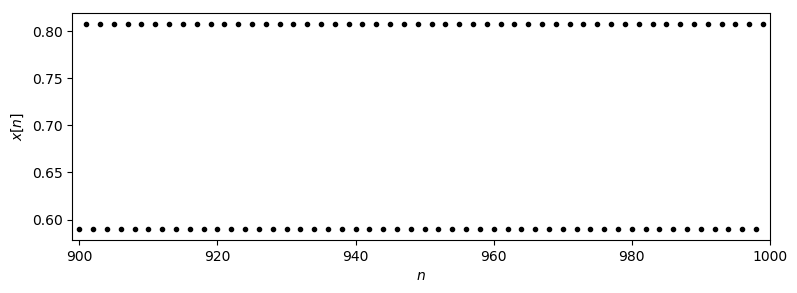

In [3]:
# Plotting time series
plt.figure(num = None, figsize = ((9,3)), dpi = 100)
plt.plot(t[ti:tf], x[ti:tf], '.k')
plt.ylabel(r"$x[n]$")
plt.xlabel(r"$n$")
plt.xlim(t[ti-1], t[tf])
plt.show()

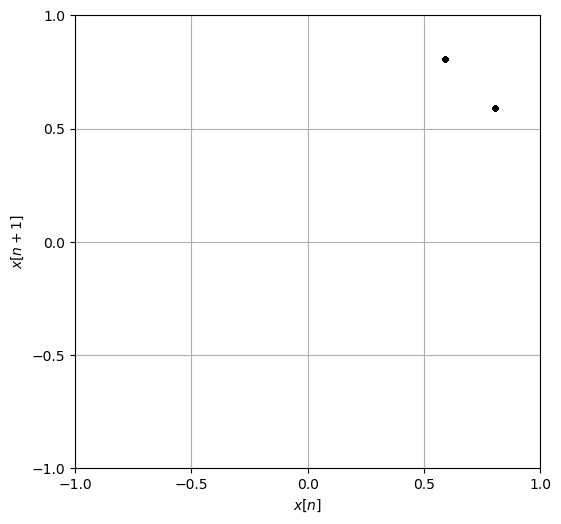

In [4]:
# Plotting first return
plt.figure(num = None, figsize = ((6,6)), dpi = 100)
plt.plot(x[ti:tf-1:1], x[ti+1:tf:1], '.k')
plt.grid( True )
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r"$x[n]$")
plt.ylabel(r"$x[n+1]$")
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.show()

## Chaotic example

In [5]:
t, x = discrete.cubic_map_v2(n = 1000, m = 2.8, x0 = 0.2)
ti = 900
tf = 1000

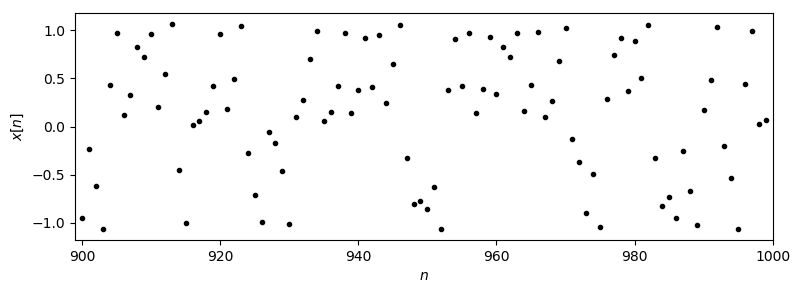

In [6]:
# Plotting time series
plt.figure(num = None, figsize = ((9,3)), dpi = 100)
plt.plot(t[ti:tf], x[ti:tf], '.k')
plt.ylabel(r"$x[n]$")
plt.xlabel(r"$n$")
plt.xlim(t[ti-1], t[tf])
plt.show()

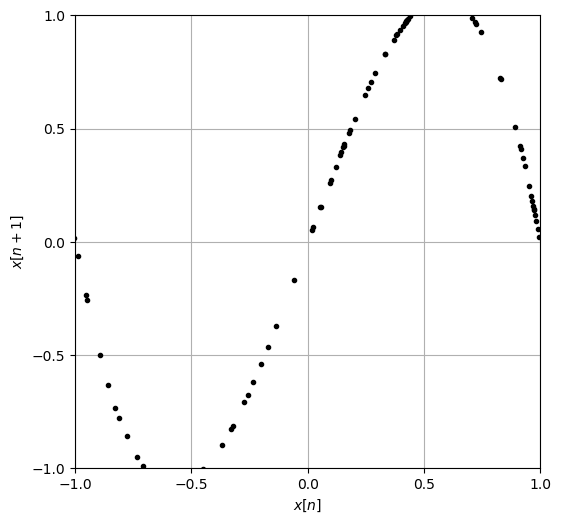

In [7]:
# Plotting first return
plt.figure(num = None, figsize = ((6,6)), dpi = 100)
plt.plot(x[ti:tf-1:1], x[ti+1:tf:1], '.k')
plt.grid( True )
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(r"$x[n]$")
plt.ylabel(r"$x[n+1]$")
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.show()

## Bifurcation diagram

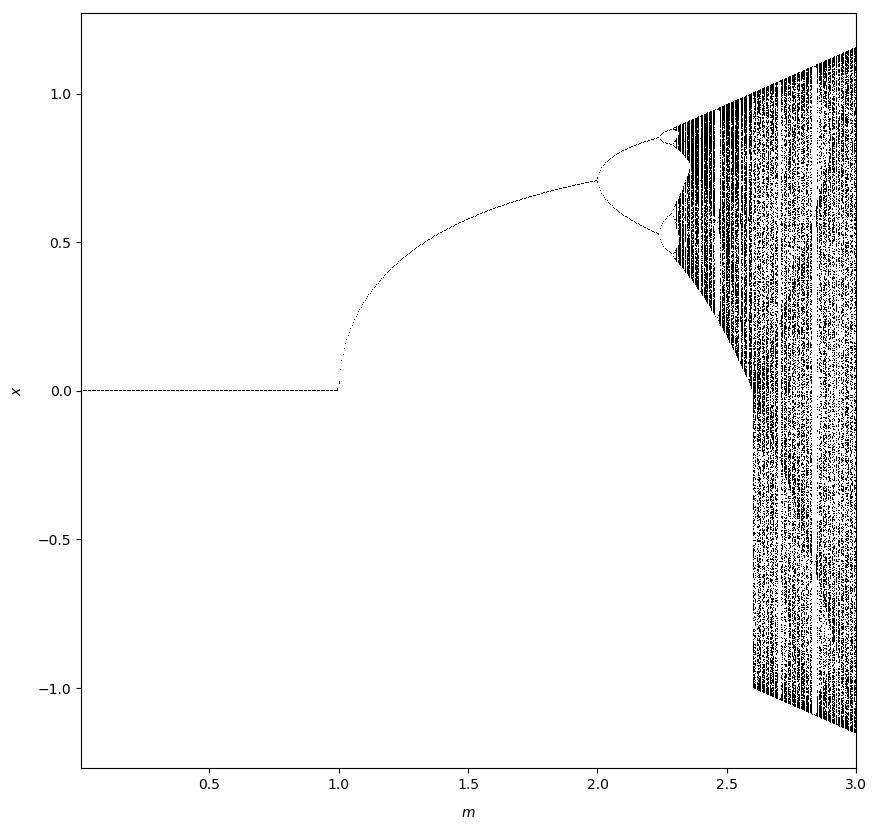

In [8]:
m_min, m_max, dm = 0.005, 3.0, 0.005
m_values = np.arange(m_min, m_max+dm, dm)
ti = 500
tf = 1000
dt = tf-ti

plt.figure(num = None, figsize=(10,10), dpi = 100)
for m in m_values:
    t, x = discrete.cubic_map_v2(n = 1000, m = m, x0 = 0.2)
    plt.plot([m]*dt, x[ti:tf], ',k')
    del t, x
plt.ylabel(r"$x$", labelpad = 10)
plt.xlabel(r"$m$", labelpad = 10)
plt.xlim(m_min, m_max)
plt.show()

## Lypunov exponent

The Lyapunov exponent ($\lambda$) of a dynamical system represents the average exponential rate at which nearby trajectories deviate from each other with time. For one-dimensional discrete time system, it is calculated by

$$\lambda \; = \; \lim_{n \rightarrow \infty } \: \frac{1}{n} \: \sum_{i=1}^{n} \: \ln\left( \, f'(x[i]) \, \right )$$

If $\lambda < 0$, the separation between neighboring trajectories will decrease in time. If $\lambda > 0$, neighboring trajectories will diverge exponentially from each other at large $n$. 

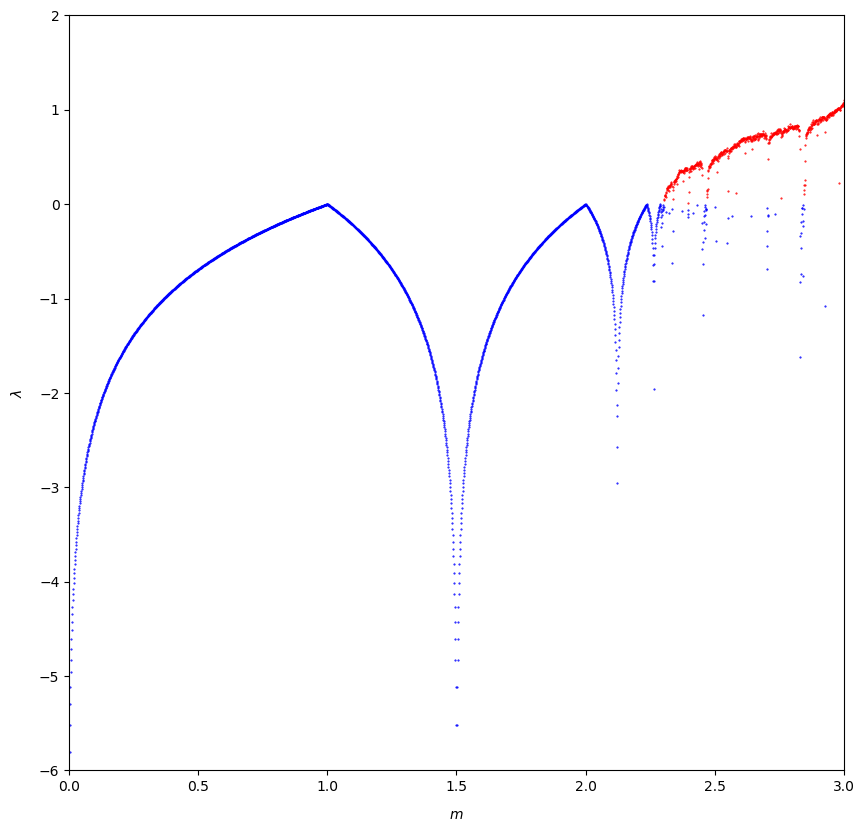

In [9]:
m_min, m_max, dm = 0.001, 3.0, 0.001
m_values = np.arange(m_min, m_max+dm, dm)

plt.figure(num = None, figsize=(10,10), dpi = 100)
for m in m_values:
    lyapunov = discrete.cubic_map_v2_lyapunov(n_transient = 1000, n = 1000, m = m, x0 = 0.2)
    if lyapunov <= 0.:
        plt.plot(m, lyapunov, '.b', markersize = 1)
    else:   
        plt.plot(m, lyapunov, '.r', markersize = 1)
    del lyapunov
plt.ylabel(r"$\lambda$", labelpad = 10)
plt.xlabel(r"$m$", labelpad = 10)
plt.xlim(m_min, m_max)
plt.ylim(-6, 2)
plt.show()

## Reference

VARIOUS BIFURCATIONS IN A CUBIC MAP

Hemanta Kr. Sarmah, Mridul Chandra Das, Various Bifurcations in a cubic map, International Journal of Advanced Scientific and Technical Research, 3(4): 827-8  (2014).